<a href="https://colab.research.google.com/github/DavidCastro88/MLappliedtoSCM/blob/main/ClusteringProductsSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://www.kaggle.com/datasets/harshsingh2209/supply-chain-analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
data= pd.read_csv('https://raw.githubusercontent.com/DavidCastro88/MLappliedtoSCM/main/Data/products_dataset.csv', decimal='.')
data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [ ]:
data.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [ ]:
data.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


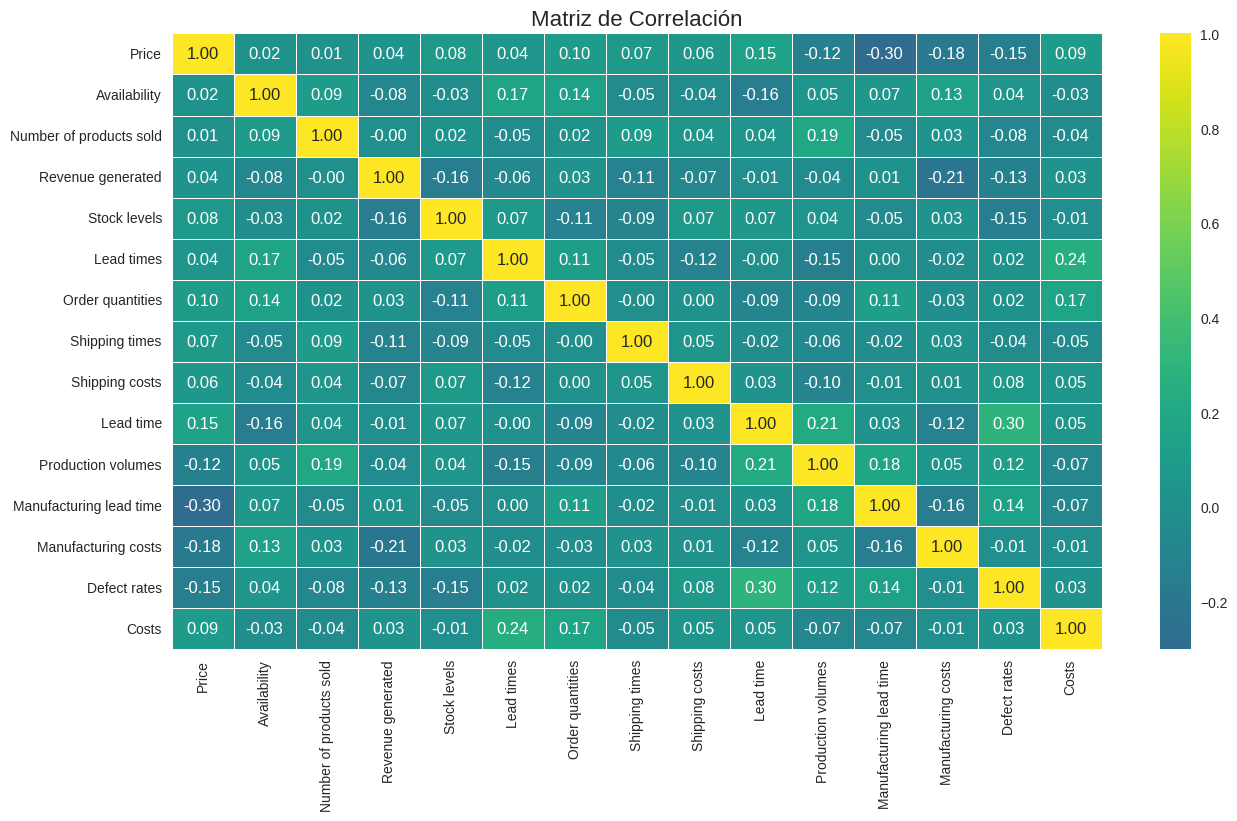

In [ ]:
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0, fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Matriz de Correlación', fontsize=16)
plt.show()

## Product Type

In [ ]:
data['Product type'].value_counts()

Product type
skincare     40
haircare     34
cosmetics    26
Name: count, dtype: int64

In [ ]:
data['Customer demographics'].value_counts()

Customer demographics
Unknown       31
Female        25
Non-binary    23
Male          21
Name: count, dtype: int64

In [ ]:
data['Shipping carriers'].value_counts()

Shipping carriers
Carrier B    43
Carrier C    29
Carrier A    28
Name: count, dtype: int64

In [ ]:
data['Supplier name'].value_counts()

Supplier name
Supplier 1    27
Supplier 2    22
Supplier 5    18
Supplier 4    18
Supplier 3    15
Name: count, dtype: int64

In [ ]:
data['Location'].value_counts()

Location
Kolkata      25
Mumbai       22
Chennai      20
Bangalore    18
Delhi        15
Name: count, dtype: int64

In [ ]:
data['Inspection results'].value_counts()

Inspection results
Pending    41
Fail       36
Pass       23
Name: count, dtype: int64

In [ ]:
data['Transportation modes'].value_counts()

Transportation modes
Road    29
Rail    28
Air     26
Sea     17
Name: count, dtype: int64

In [ ]:
data['Routes'].value_counts()

Routes
Route A    43
Route B    37
Route C    20
Name: count, dtype: int64

In [ ]:
data.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [ ]:
data=data[['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated',
       'Stock levels', 'Order quantities', 'Shipping times',
        'Shipping costs',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs',  'Defect rates', 'Costs']]

In [ ]:
data

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Stock levels,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,58,96,4,2.956572,29,215,29,46.279879,0.226410,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,53,37,2,9.716575,23,517,30,33.616769,4.854068,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,1,88,2,8.054479,12,971,27,30.688019,4.580593,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,23,59,6,1.729569,24,937,18,35.624741,4.746649,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,5,56,8,3.890548,5,414,3,92.065161,3.145580,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,15,26,9,8.630339,18,450,26,58.890686,1.210882,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,67,32,3,5.352878,28,648,28,17.803756,3.872048,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,46,4,9,7.904846,10,535,13,65.765156,3.376238,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,53,27,7,1.409801,28,581,9,5.604691,2.908122,882.198864


In [ ]:
data.set_index('SKU', inplace=True)

In [ ]:
data

,Product type,Price,Availability,Number of products sold,Revenue generated,Stock levels,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
SKU,,,,,,,,,,,,,,,
SKU0,haircare,69.808006,55,802,8661.996792,58,96,4,2.956572,29,215,29,46.279879,0.226410,187.752075
SKU1,skincare,14.843523,95,736,7460.900065,53,37,2,9.716575,23,517,30,33.616769,4.854068,503.065579
SKU2,haircare,11.319683,34,8,9577.749626,1,88,2,8.054479,12,971,27,30.688019,4.580593,141.920282
SKU3,skincare,61.163343,68,83,7766.836426,23,59,6,1.729569,24,937,18,35.624741,4.746649,254.776159
SKU4,skincare,4.805496,26,871,2686.505152,5,56,8,3.890548,5,414,3,92.065161,3.145580,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SKU95,haircare,77.903927,65,672,7386.363944,15,26,9,8.630339,18,450,26,58.890686,1.210882,778.864241
SKU96,cosmetics,24.423131,29,324,7698.424766,67,32,3,5.352878,28,648,28,17.803756,3.872048,188.742141
SKU97,haircare,3.526111,56,62,4370.916580,46,4,9,7.904846,10,535,13,65.765156,3.376238,540.132423


In [ ]:
data['Product type'] = data['Product type'].replace({'skincare': 1, 'haircare': 2, 'cosmetics': 3})

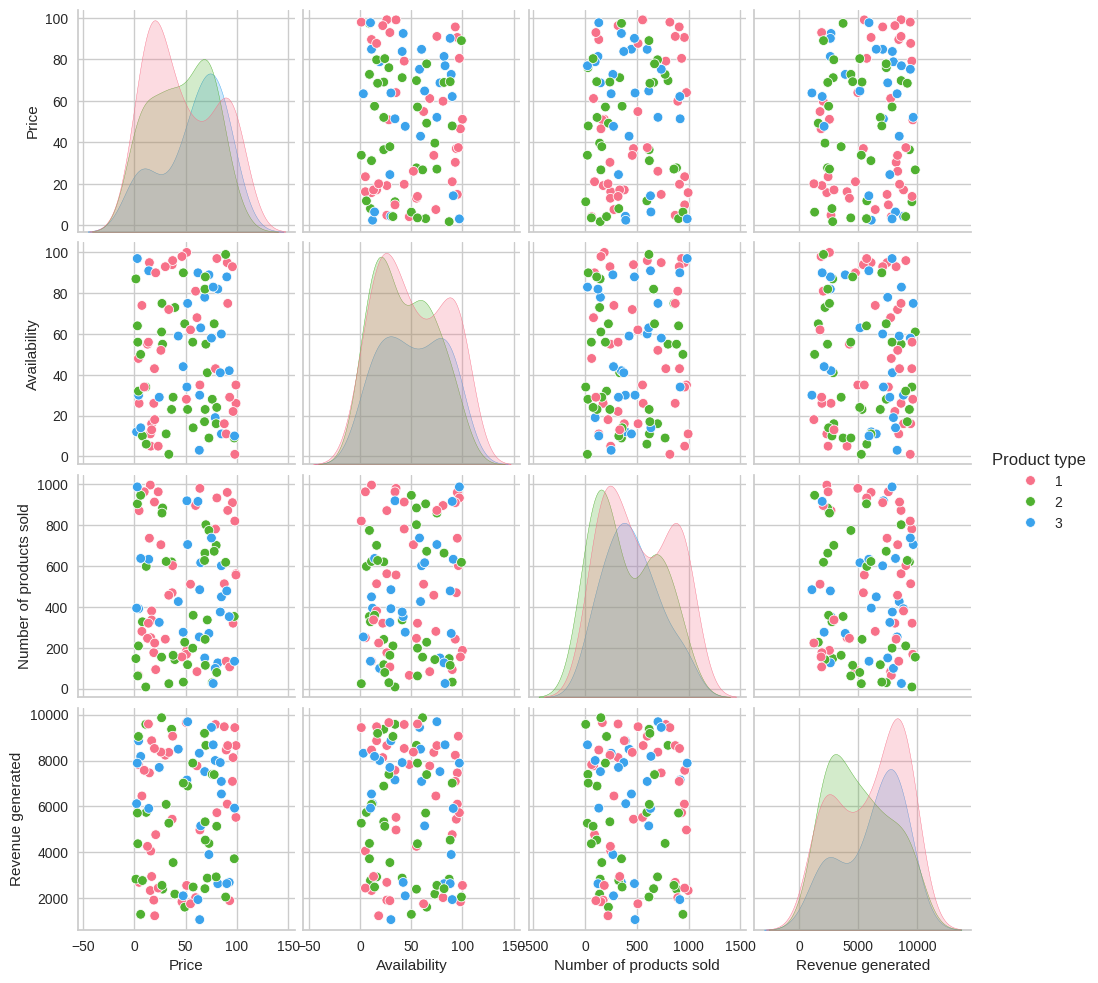

In [ ]:
custom_palette = sns.color_palette("husl", n_colors=3)
sns.pairplot(data[['Product type', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated']], hue='Product type', palette=custom_palette)
plt.show()

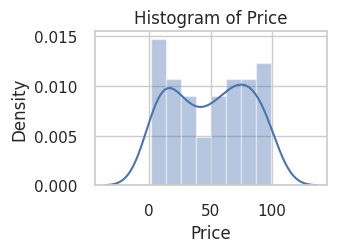

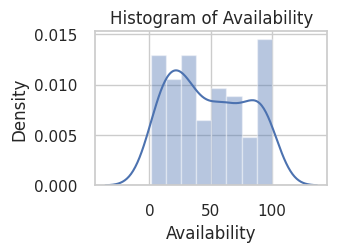

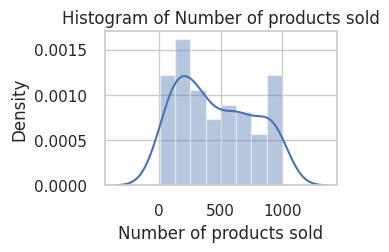

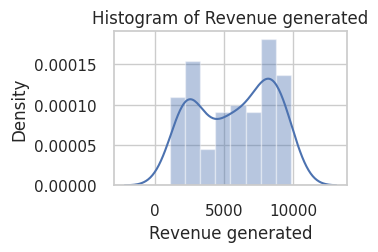

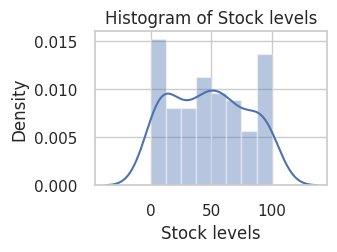

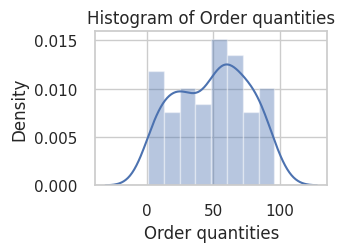

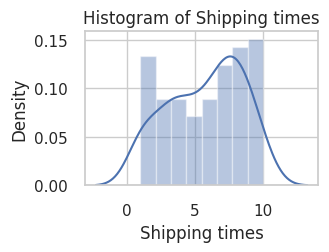

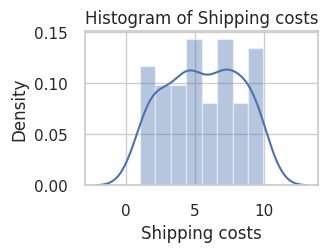

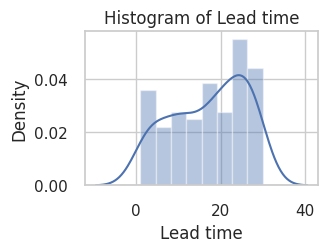

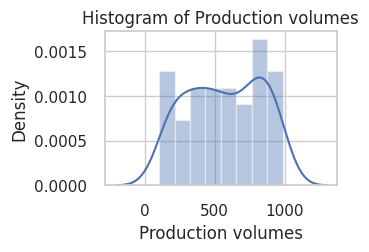

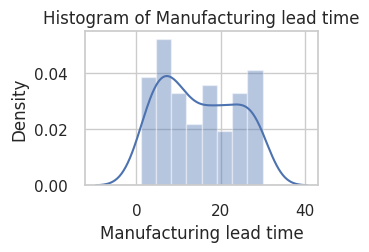

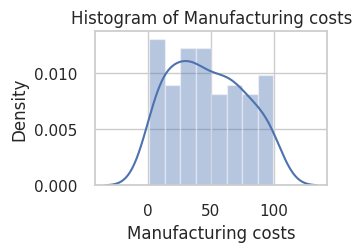

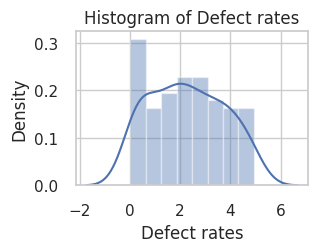

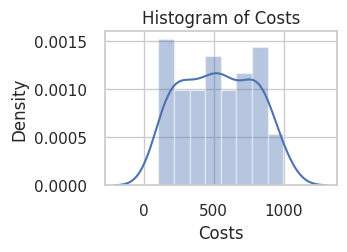

In [ ]:
columns = ['Price', 'Availability',
       'Number of products sold', 'Revenue generated',
       'Stock levels',  'Order quantities', 'Shipping times',
        'Shipping costs',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs',  'Defect rates', 'Costs']

for feature in columns:
    sns.set(style="whitegrid")
    plt.figure(figsize=(3, 2))
    sns.histplot(data[feature],
                 kde=True,
                 stat="density",
                 kde_kws=dict(cut=3),
                 alpha=.4,
                 edgecolor=(1, 1, 1, .4))
    plt.title(f'Histogram of {feature}')
    plt.show()

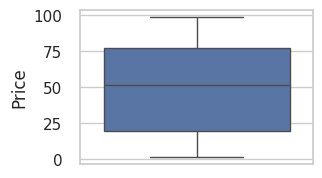

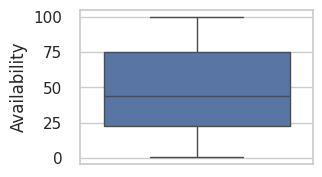

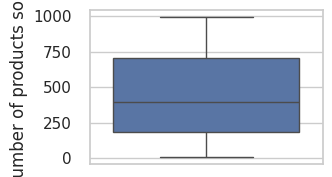

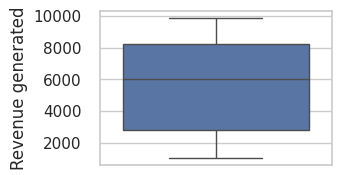

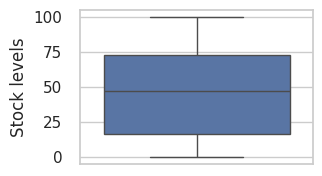

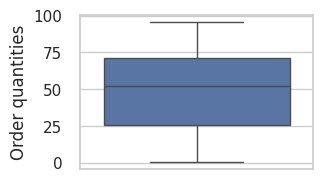

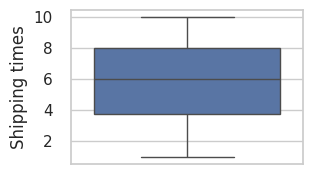

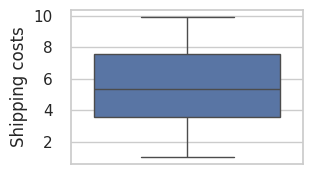

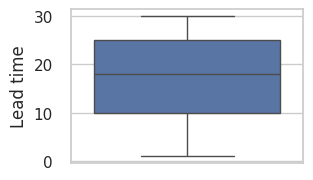

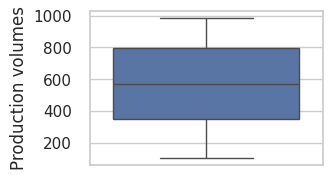

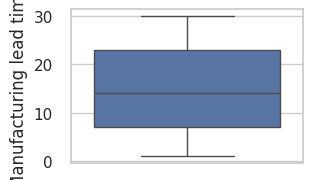

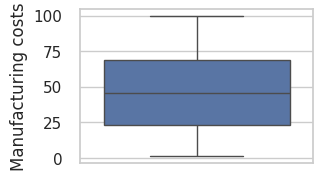

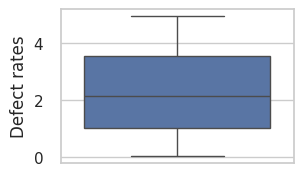

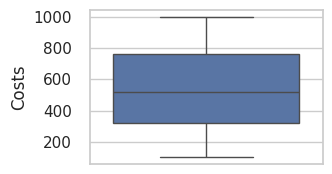

In [ ]:
for feature in columns:
  plt.figure(figsize=(3, 2))
  sns.boxplot(data=data,y=data[feature])

In [ ]:
data.columns

Index(['Product type', 'Price', 'Availability', 'Number of products sold',
       'Revenue generated', 'Stock levels', 'Order quantities',
       'Shipping times', 'Shipping costs', 'Lead time', 'Production volumes',
       'Manufacturing lead time', 'Manufacturing costs', 'Defect rates',
       'Costs'],
      dtype='object')

In [ ]:
data_cl1= data[['Number of products sold','Revenue generated', 'Stock levels', 'Lead time']]
scaler = StandardScaler()
data_cl1[data_cl1.columns] = scaler.fit_transform(data_cl1[data_cl1.columns])
X_train, X_val = train_test_split(data_cl1, test_size=0.2, random_state=1983)
X_cl = X_train.copy()
X_clv = X_val.copy()

<ipython-input-26-aa91e885f8c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cl1[data_cl1.columns] = scaler.fit_transform(data_cl1[data_cl1.columns])


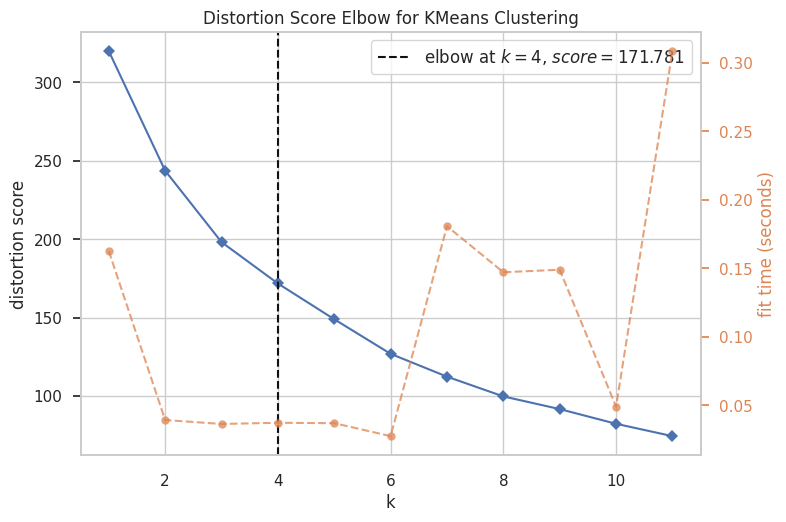

In [ ]:
model1 = KMeans(random_state=88)
visualizer = KElbowVisualizer(model1, k=(1, 12))
visualizer.fit(X_train)
visualizer.show();

In [ ]:
def generate_siluet(X_train, n_clusters):
    model = KMeans(n_clusters=n_clusters, n_init="auto", random_state=88)
    cluster_labels = model.fit_predict(X_train)
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    sample_silhouette_values = silhouette_samples(X_train, cluster_labels)
    plt.figure(figsize=(9, 5))
    plt.xlim([-0.1, 1])
    plt.ylim([0, len(X_train) + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    plt.title(f"Silhouette analysis for KMeans clustering with {n_clusters} clusters")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.text(silhouette_avg + 0.02, 5, f'Average Silhouette Score: {silhouette_avg:.4f}', color="red")
    plt.yticks([])
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

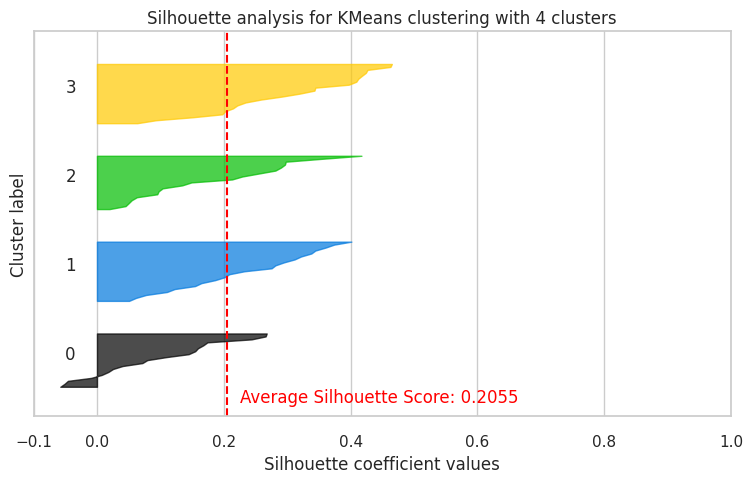

In [ ]:
generate_siluet(X_train,4)

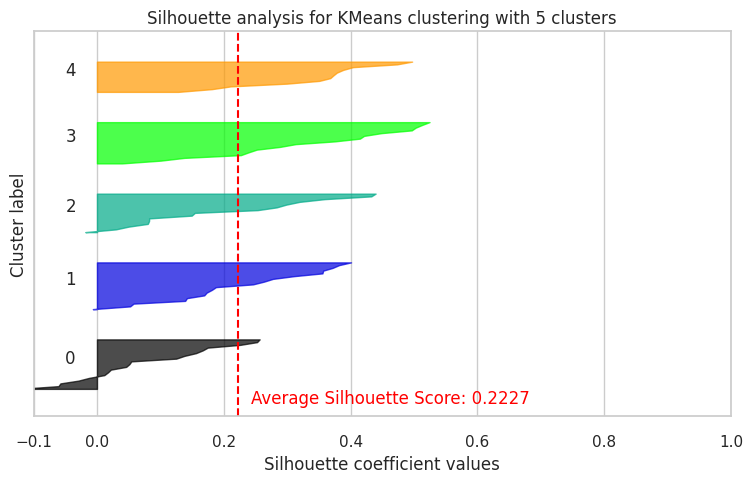

In [ ]:
generate_siluet(X_train,5)

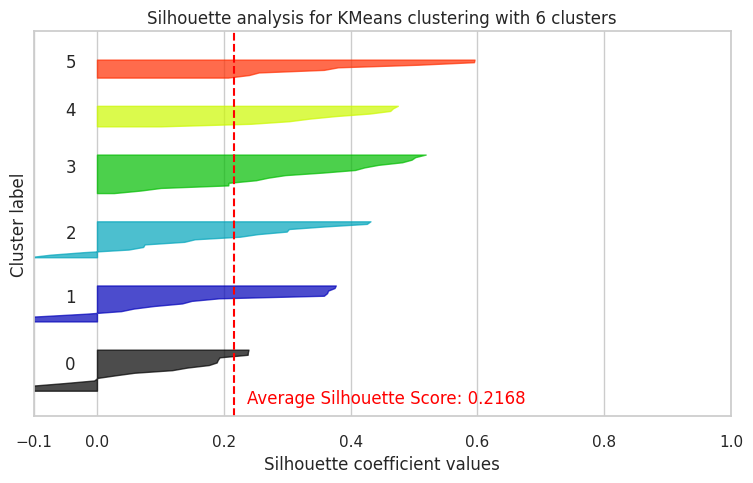

In [ ]:
generate_siluet(X_train,6)

In [ ]:
inertia_scores=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(X_train)
  inertia_scores.append(kmeans.inertia_)
inertia_scores

[319.95558482036915,
 243.70631551549445,
 198.62632946041498,
 172.28297540228766,
 148.7177119025337,
 125.65303356161377,
 112.2509297244918,
 98.98618987610779,
 90.65309199132543,
 84.12503792048327]

In [ ]:
kmeans_model = KMeans(n_clusters=5,n_init = 'auto', random_state=88)
kmeans_model.fit(X_train)

KMeans(n_clusters=5, n_init='auto', random_state=88)

In [ ]:
y_lab = kmeans_model.fit_predict(X_train)
pd.crosstab(y_lab,'Conteo')

col_0,Conteo
row_0,
0,19
1,18
2,15
3,16
4,12


In [ ]:
X_cl['Cluster'] = kmeans_model.labels_
X_cl['Cluster'].value_counts()

Cluster
0    19
1    18
3    16
2    15
4    12
Name: count, dtype: int64

In [ ]:
clusters_val=kmeans_model.predict(X_clv)
X_clv['Cluster'] = clusters_val

In [ ]:
X_clv['Cluster'].value_counts()

Cluster
3    7
0    5
4    4
2    2
1    2
Name: count, dtype: int64

In [ ]:
data_cluster = pd.concat([X_cl, X_clv], ignore_index=False)
data_cluster

,Number of products sold,Revenue generated,Stock levels,Lead time,Cluster
SKU,,,,,
SKU27,-0.360587,-1.136237,-0.024670,0.899805,1
SKU52,1.187763,1.345907,0.519990,-0.804371,3
SKU63,-0.711281,-0.558668,0.199602,0.104523,0
SKU51,-1.015658,1.504304,1.673388,0.104523,0
SKU53,-0.724515,0.903331,1.545233,-1.826876,0
...,...,...,...,...,...
SKU58,1.439204,-1.380912,-1.210106,0.104523,1
SKU94,1.740272,0.776829,0.936495,-0.577148,3
SKU70,-1.419287,0.455599,-1.210106,0.558970,4


In [ ]:
data_cluster['Cluster']=data_cluster['Cluster'] + 1
data_cluster['Cluster'].value_counts()

Cluster
1    24
4    23
2    20
3    17
5    16
Name: count, dtype: int64

In [ ]:
data_seg = pd.merge(data, data_cluster[['Cluster']], left_index=True, right_index=True)
data_seg

,Product type,Price,Availability,Number of products sold,Revenue generated,Stock levels,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs,Cluster
SKU,,,,,,,,,,,,,,,,
SKU0,2,69.808006,55,802,8661.996792,58,96,4,2.956572,29,215,29,46.279879,0.226410,187.752075,4
SKU1,1,14.843523,95,736,7460.900065,53,37,2,9.716575,23,517,30,33.616769,4.854068,503.065579,4
SKU2,2,11.319683,34,8,9577.749626,1,88,2,8.054479,12,971,27,30.688019,4.580593,141.920282,5
SKU3,1,61.163343,68,83,7766.836426,23,59,6,1.729569,24,937,18,35.624741,4.746649,254.776159,5
SKU4,1,4.805496,26,871,2686.505152,5,56,8,3.890548,5,414,3,92.065161,3.145580,923.440632,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SKU95,2,77.903927,65,672,7386.363944,15,26,9,8.630339,18,450,26,58.890686,1.210882,778.864241,4
SKU96,3,24.423131,29,324,7698.424766,67,32,3,5.352878,28,648,28,17.803756,3.872048,188.742141,4
SKU97,2,3.526111,56,62,4370.916580,46,4,9,7.904846,10,535,13,65.765156,3.376238,540.132423,1


In [ ]:
data_seg =data_seg[['Number of products sold','Revenue generated', 'Stock levels', 'Lead time','Cluster']]

In [ ]:
import plotly.express as px
fig = px.scatter_3d(data_seg, x='Number of products sold', y='Revenue generated', z='Lead time',color='Cluster',hover_data={'SKU': data_seg.index})
fig.write_html("mi_grafico.html")
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(data_seg, x='Stock levels', y='Revenue generated', z='Lead time',color='Cluster')
fig.write_html("mi_grafico.html")
fig.show()

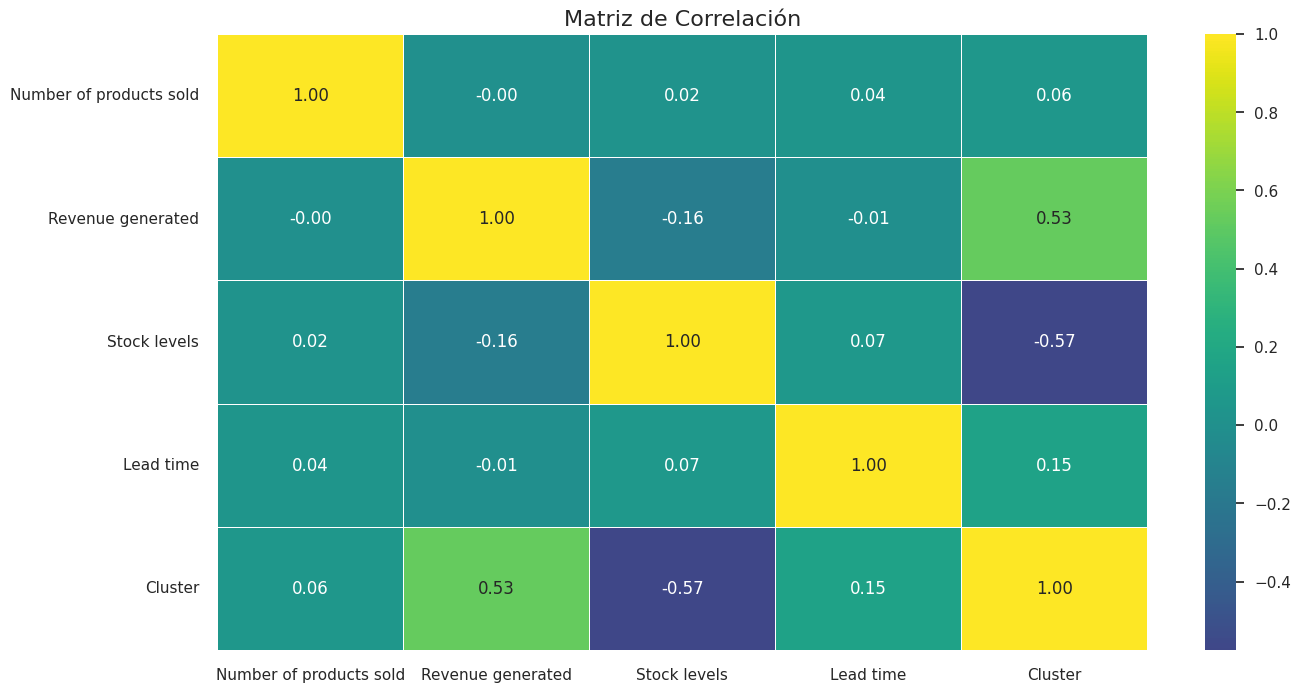

In [ ]:
correlation_matrix = data_seg.corr(numeric_only=True)
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0, fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Matriz de Correlación', fontsize=16)
plt.show()

<Axes: xlabel='Stock levels', ylabel='Revenue generated'>

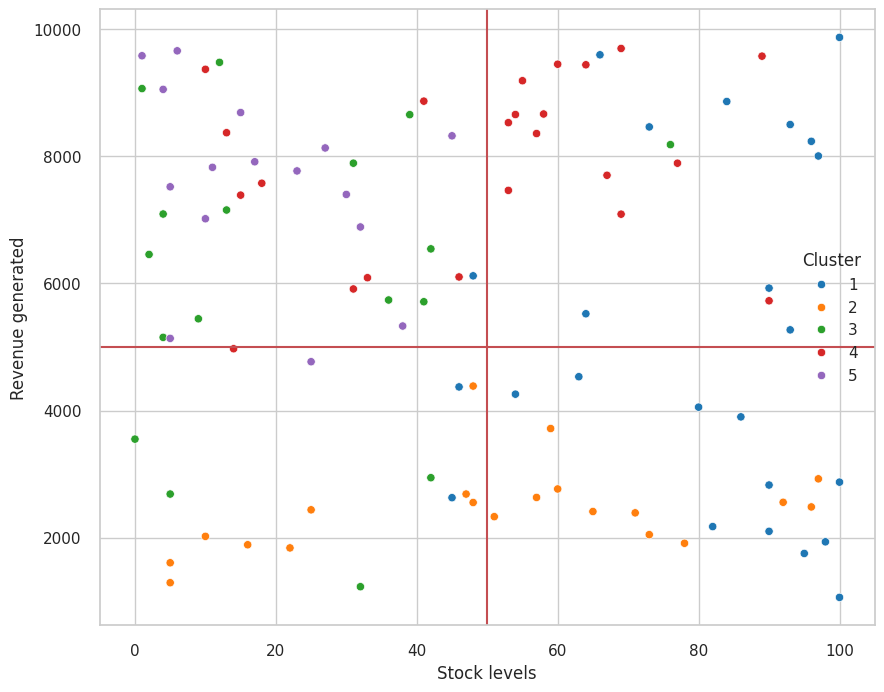

In [ ]:
plt.figure(figsize=(10,8))
plt.axvline(x=50, color='r')
plt.axhline(y=5000, color='r')
sns.scatterplot(data=data_seg,x='Stock levels', y='Revenue generated',hue='Cluster',palette='tab10')

<Axes: xlabel='Number of products sold', ylabel='Lead time'>

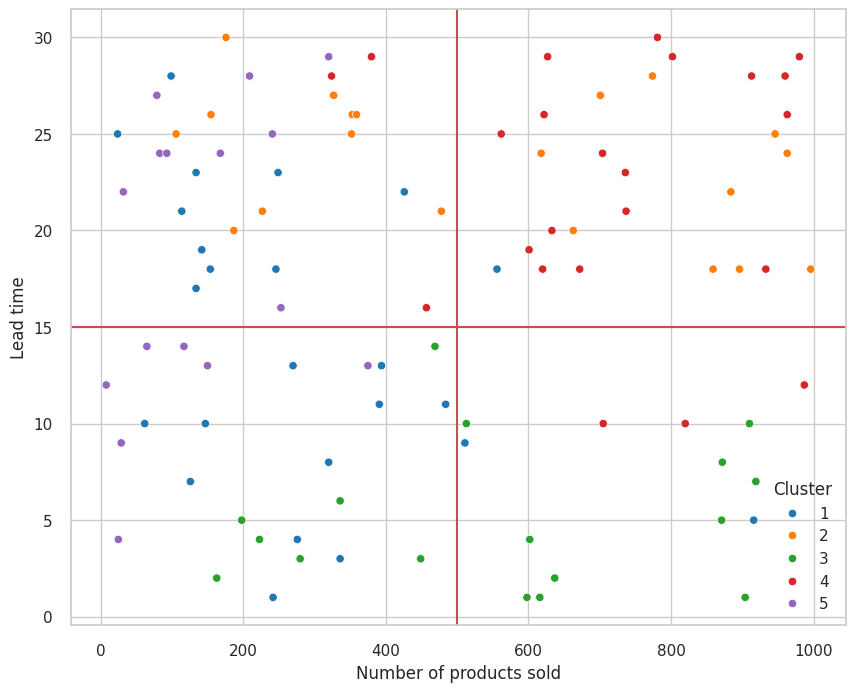

In [ ]:
plt.figure(figsize=(10,8))
plt.axvline(x=500, color='r')
plt.axhline(y=15, color='r')
sns.scatterplot(data=data_seg,x='Number of products sold', y='Lead time',hue='Cluster',palette='tab10')

<Axes: xlabel='Lead time', ylabel='Stock levels'>

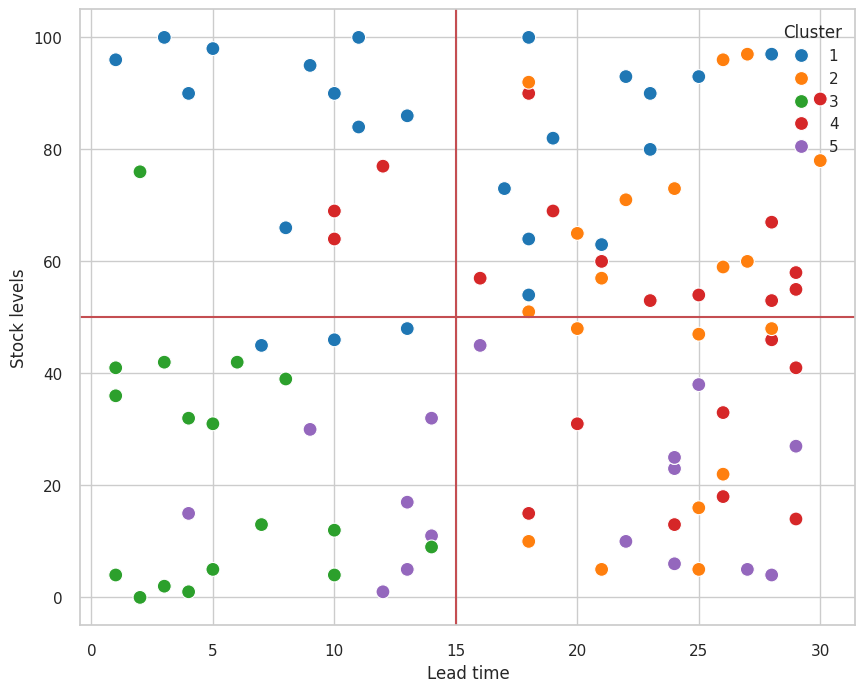

In [ ]:
plt.figure(figsize=(10,8))
plt.axvline(x=15, color='r')
plt.axhline(y=50, color='r')
sns.scatterplot(data=data_seg,x='Lead time', y='Stock levels',hue='Cluster',palette='tab10',s=100)

<Axes: xlabel='Number of products sold', ylabel='Stock levels'>

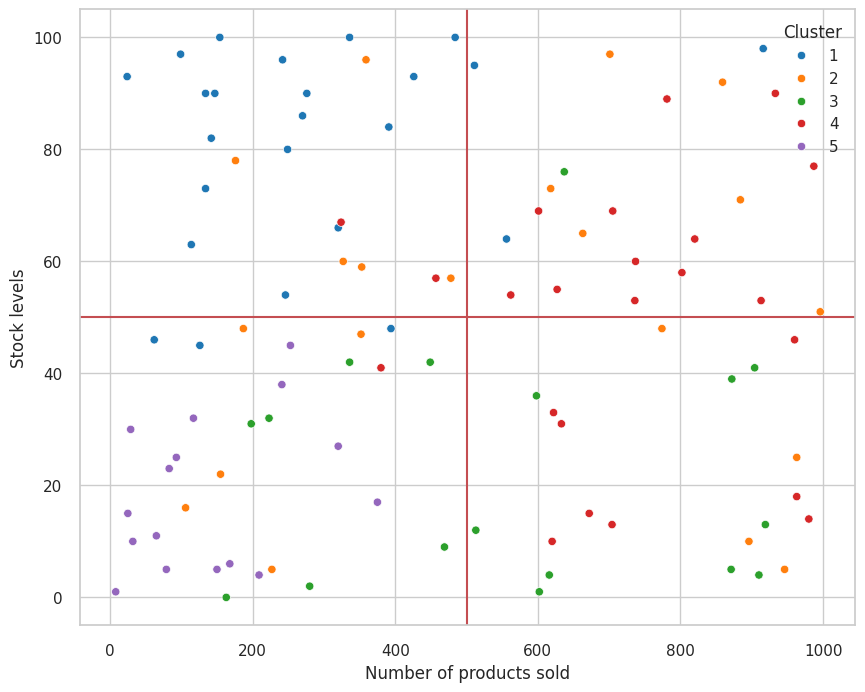

In [ ]:
plt.figure(figsize=(10,8))
plt.axvline(x=500, color='r')
plt.axhline(y=50, color='r')
sns.scatterplot(data=data_seg,x='Number of products sold', y='Stock levels',hue='Cluster',palette='tab10')

In [ ]:
data_seg.index[data_seg['Cluster'] == 1]

Index(['SKU5', 'SKU7', 'SKU12', 'SKU13', 'SKU17', 'SKU23', 'SKU25', 'SKU28',
       'SKU41', 'SKU45', 'SKU49', 'SKU51', 'SKU53', 'SKU59', 'SKU62', 'SKU63',
       'SKU64', 'SKU69', 'SKU89', 'SKU90', 'SKU91', 'SKU92', 'SKU93', 'SKU97'],
      dtype='object', name='SKU')

In [ ]:
for cluster in range(1,6):
  print(f'Los productos del cluster {cluster} son:')
  productos=list(data_seg.index[data_seg['Cluster'] == cluster])
  print(', '.join(productos))
  print()

Los productos del cluster 1 son:
SKU5, SKU7, SKU12, SKU13, SKU17, SKU23, SKU25, SKU28, SKU41, SKU45, SKU49, SKU51, SKU53, SKU59, SKU62, SKU63, SKU64, SKU69, SKU89, SKU90, SKU91, SKU92, SKU93, SKU97

Los productos del cluster 2 son:
SKU10, SKU19, SKU22, SKU26, SKU27, SKU30, SKU37, SKU39, SKU42, SKU46, SKU55, SKU57, SKU58, SKU72, SKU75, SKU77, SKU78, SKU81, SKU83, SKU84

Los productos del cluster 3 son:
SKU4, SKU15, SKU16, SKU33, SKU34, SKU35, SKU43, SKU44, SKU47, SKU67, SKU68, SKU71, SKU74, SKU79, SKU80, SKU82, SKU86

Los productos del cluster 4 son:
SKU0, SKU1, SKU9, SKU11, SKU14, SKU18, SKU21, SKU32, SKU36, SKU38, SKU40, SKU50, SKU52, SKU54, SKU60, SKU65, SKU66, SKU88, SKU94, SKU95, SKU96, SKU98, SKU99

Los productos del cluster 5 son:
SKU2, SKU3, SKU6, SKU8, SKU20, SKU24, SKU29, SKU31, SKU48, SKU56, SKU61, SKU70, SKU73, SKU76, SKU85, SKU87



In [ ]:
data_seg[['Number of products sold','Revenue generated', 'Stock levels', 'Lead time','Cluster']]

## ***Características de los clusters***

Cluster 1.(Productos de baja rotación):  Este cluster incluye productos que tienen niveles de stock altos pero experimentan niveles bajos de ventas. Estos productos pueden ser considerados como "lentos" en términos de rotación de inventario..

Cluster 2. (Productos de baja eficiencia) Este cluster agrupa productos que tienen tiempos de espera altos y proporcionan un margen de ganancia bajo. Estos productos pueden representar una inversión en términos de tiempo y recursos con retornos limitados.

Cluster 3. (Productos con rápida reposición) Este cluster contiene productos con niveles de stock bajos pero tiempos de espera bajos. Estos productos tienen una alta rotación y se venden rápidamente.

Cluster 4. (Productos populares con lt alto) Este cluster incluye productos con una alta demanda, pero requieren tiempos de espera largos y proporcionan un margen de ganancia alto.

Cluster 5.(productos de nicho) Este cluster agrupa productos con niveles de stock bajos, ventas escasas, tiempos de espera medio-altos pero que tienen márgenes altos de ganancia.

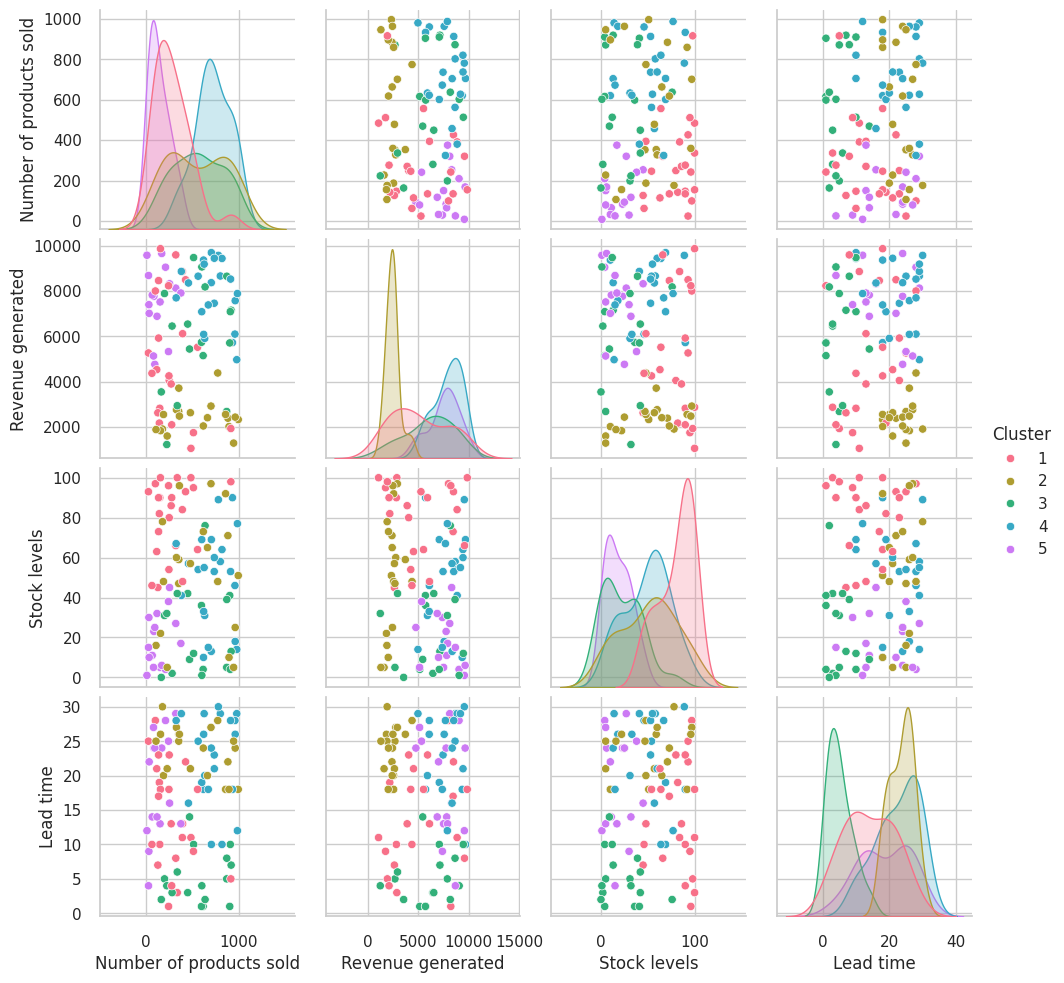

In [ ]:
custom_palette = sns.color_palette("husl", n_colors=5)
sns.pairplot(data_seg, hue='Cluster', palette=custom_palette)
plt.show()